In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [75]:
train = pd.read_csv('train.csv')
y = train['Survived']
del train['Survived']
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Проведем краткое исследование данных, построим бейзлайн, результаты которого попытаемся улучшить

In [82]:
data = pd.concat([train, test])
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [85]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Пропущенные данные в графе возраст заменим медианой, данные в графе с номером кабины практически отсутствуют, удалим его, пропущенные данные в графе порт посадки заменим на наиболее часто  встречающиеся значение

In [86]:
data['Age'] = data['Age'].fillna(np.median(data['Age'].loc[(data['Age'].isnull()== False)]))

In [87]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [88]:
data['Embarked'] = data['Embarked'].fillna('S')
del data['Cabin']

In [93]:
data.Pclass.loc[data['Fare'].isnull()]

152    3
Name: Pclass, dtype: int64

Пасажир для которого пропущено значение цены его билета был в третьем классе, заполним это значение медианой цен на билеты в третьем классе

In [96]:
data['Fare'] = data['Fare'].fillna(np.median(data['Fare'].loc[data['Pclass']==3]))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [146]:
np.median(data['Fare'][data.Pclass ==3]

SyntaxError: unexpected EOF while parsing (<ipython-input-146-5cdd6f20bc34>, line 1)

In [165]:
third_class = data[data.Pclass == 3]
k = np.median(third_class.loc[third_class['Fare'].isnull() == False].Fare)
#data['Fare'] = data['Fare'].fillna(np.median(third_class.loc[third_class['Fare'].isnull() == False].Fare)
data['Fare'].fillna(k)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 152.5+ KB


In [164]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Закодируем категориальные перменные, исследуем признак 'Name' и получим датасет для получения базовой линии, которую мы будем пытаться превзойти

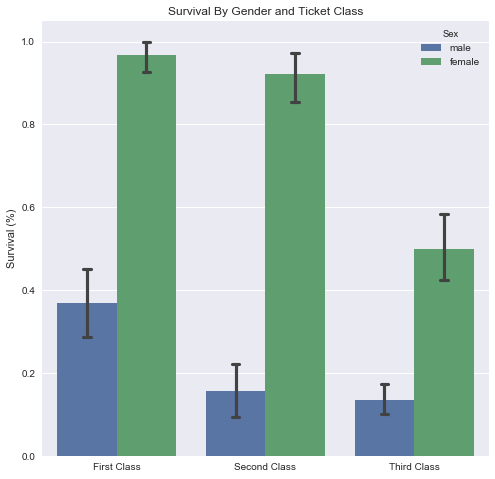

In [28]:
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(
    ax=ax,
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=train,
    capsize=0.05
)
ax.set_title("Survival By Gender and Ticket Class")
ax.set_ylabel("Survival (%)")
ax.set_xlabel("")
ax.set_xticklabels(["First Class", "Second Class", "Third Class"])
plt.show()

В первую очердь на спасали женьщин, также спаслась большая доля мужчин из первого класса (скорее всего обеспеченных)

In [66]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

Длина имени во времена Титаника часто указывала на высокое происхождение, что часто связано с достатком, а так как достаток влияет на вероятность выжить, то создадим новый признак - число символов в имени 

In [70]:
train['name_len'] = train['Name'].apply(len)
train['name_len']

0      23
1      51
2      22
3      44
4      24
5      16
6      23
7      30
8      49
9      35
10     31
11     24
12     30
13     27
14     36
15     32
16     20
17     28
18     55
19     23
20     20
21     21
22     27
23     28
24     29
25     57
26     23
27     30
28     29
29     19
       ..
861    27
862    51
863    33
864    22
865    24
866    28
867    36
868    27
869    31
870    17
871    48
872    24
873    27
874    37
875    32
876    29
877    20
878    18
879    45
880    44
881    18
882    28
883    29
884    22
885    36
886    21
887    28
888    40
889    21
890    19
Name: name_len, Length: 891, dtype: int64

In [71]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'name_len'],
      dtype='object')

In [ ]:
encod = OneHotEncoder()
encod.fit_transform(train[])

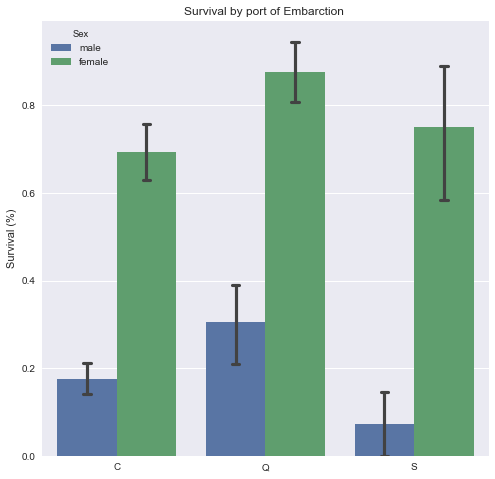

In [29]:
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(
    ax=ax,
    x='Embarked',
    y='Survived',
    hue='Sex',
    data=train,
    capsize=0.05
)
ax.set_title("Survival by port of Embarction ")
ax.set_ylabel("Survival (%)")
ax.set_xlabel("")
ax.set_xticklabels(["C", "Q", "S"])
plt.show()

Выживших из Queenstown заметно больше. Сравним распределния стоимости билетов в этих городах.

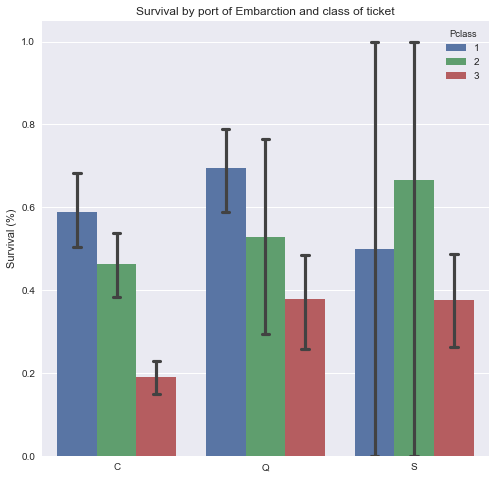

In [49]:
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(
    ax=ax,
    x='Embarked',
    y='Survived',
    hue='Pclass',
    data=train,
    capsize=0.05
)
ax.set_title("Survival by port of Embarction and class of ticket")
ax.set_ylabel("Survival (%)")
ax.set_xlabel("")
ax.set_xticklabels(["C", "Q", "S"])
plt.show()

In [65]:
print ('1st class passengers from Cherbourg:'+ str(len(train['Fare'][train['Embarked']=='C'][train['Pclass']==1])))
print ('1st class passengers from Queenstown :'+ str(len(train['Fare'][train['Embarked']=='Q'][train['Pclass']==1])))
print ('1st class passengers from Southampton :'+ str(len(train['Fare'][train['Embarked']=='S'][train['Pclass']==1])))
print ('2nd class passengers from Cherbourg:'+ str(len(train['Fare'][train['Embarked']=='C'][train['Pclass']==2])))
print ('2nd class passengers from Queenstown :'+ str(len(train['Fare'][train['Embarked']=='Q'][train['Pclass']==2])))
print ('2nd class passengers from Southampton :'+ str(len(train['Fare'][train['Embarked']=='S'][train['Pclass']==2])))

1st class passengers from Cherbourg:85
1st class passengers from Queenstown :2
1st class passengers from Southampton :129
2nd class passengers from Cherbourg:17
2nd class passengers from Queenstown :3
2nd class passengers from Southampton :164


Закодируем категориальные признаки

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Кодировать графу имя бессымысленно, однако в списке 

In [ ]:
train_cat = train[['Pclass']]